<a href="https://colab.research.google.com/github/Asfilcnx3/Project4_BreastCancer/blob/main/BreastCancer_Proyecto4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación Binaria para el dataset "Breast Cancer"

## Usaremos una red neuronal simple para clasificar las diferentes imagenes en "Maligno" = 0, "Benigno" = 1

In [ ]:
# Importamos las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean text

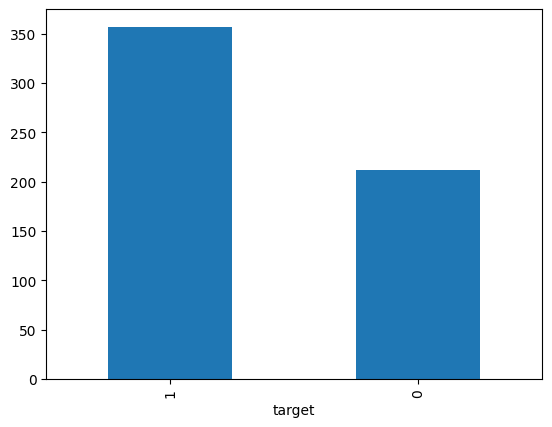

----------------------------------------


In [ ]:
# Cargando el dataset para hacer una exploración
breast_cancer = load_breast_cancer()
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target
print(df.columns)
print("----"*10)

print(df.info())
print("----"*10)

print(df["target"].value_counts())
print("----"*10)

df["target"].value_counts().plot(kind="bar")
plt.show()
print("----"*10)

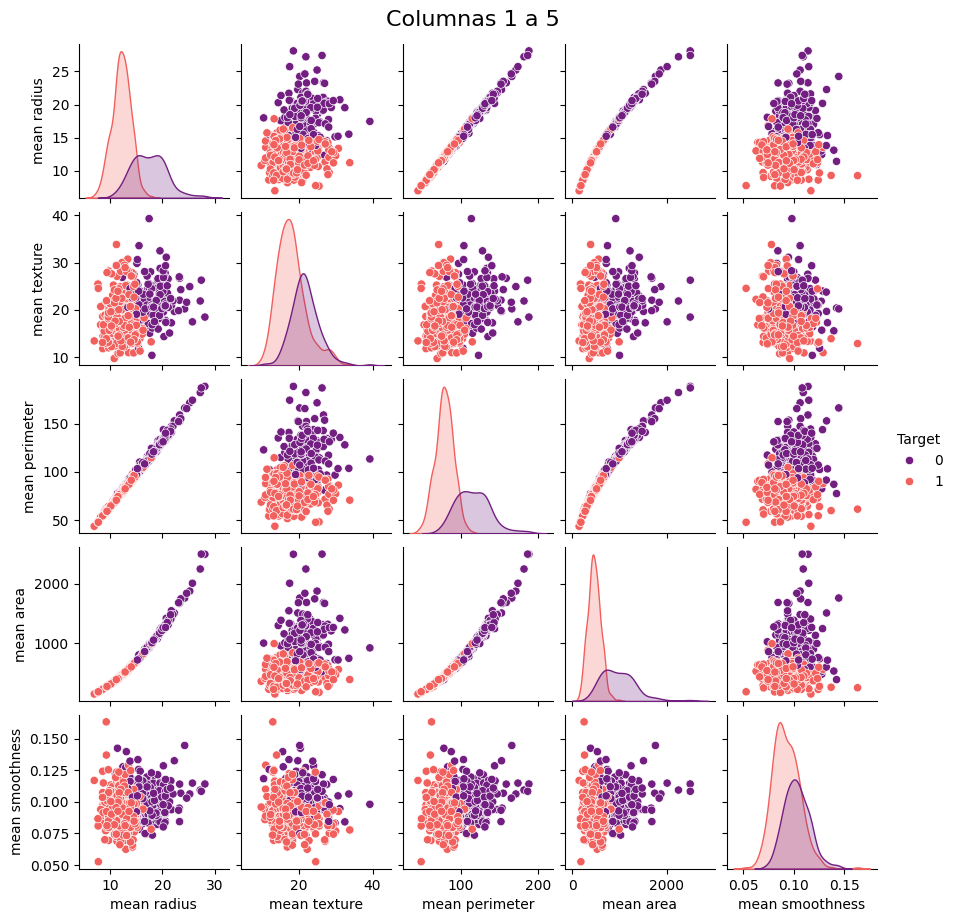

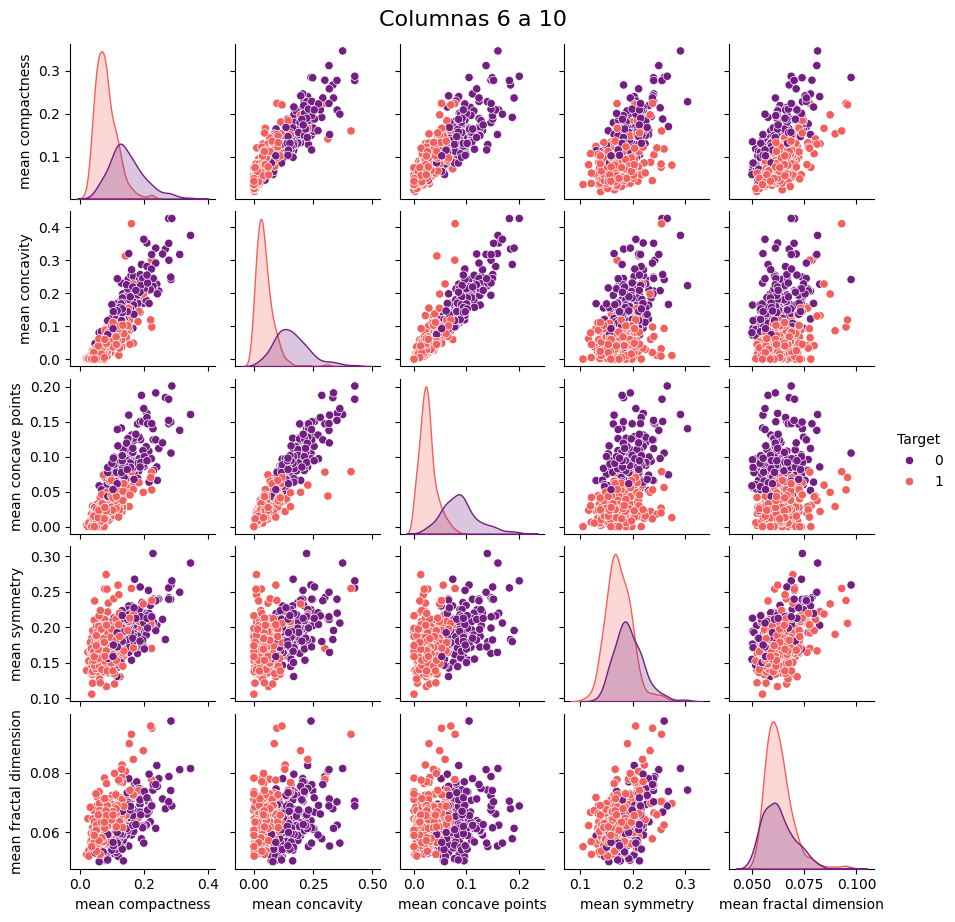

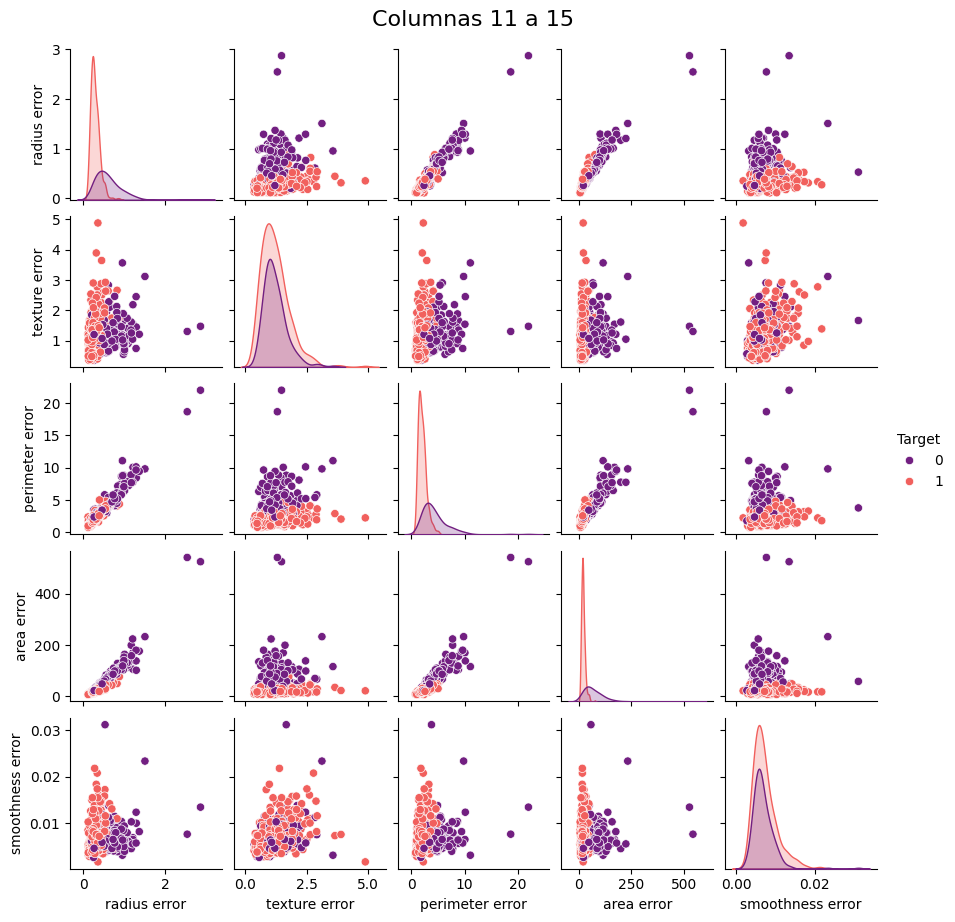

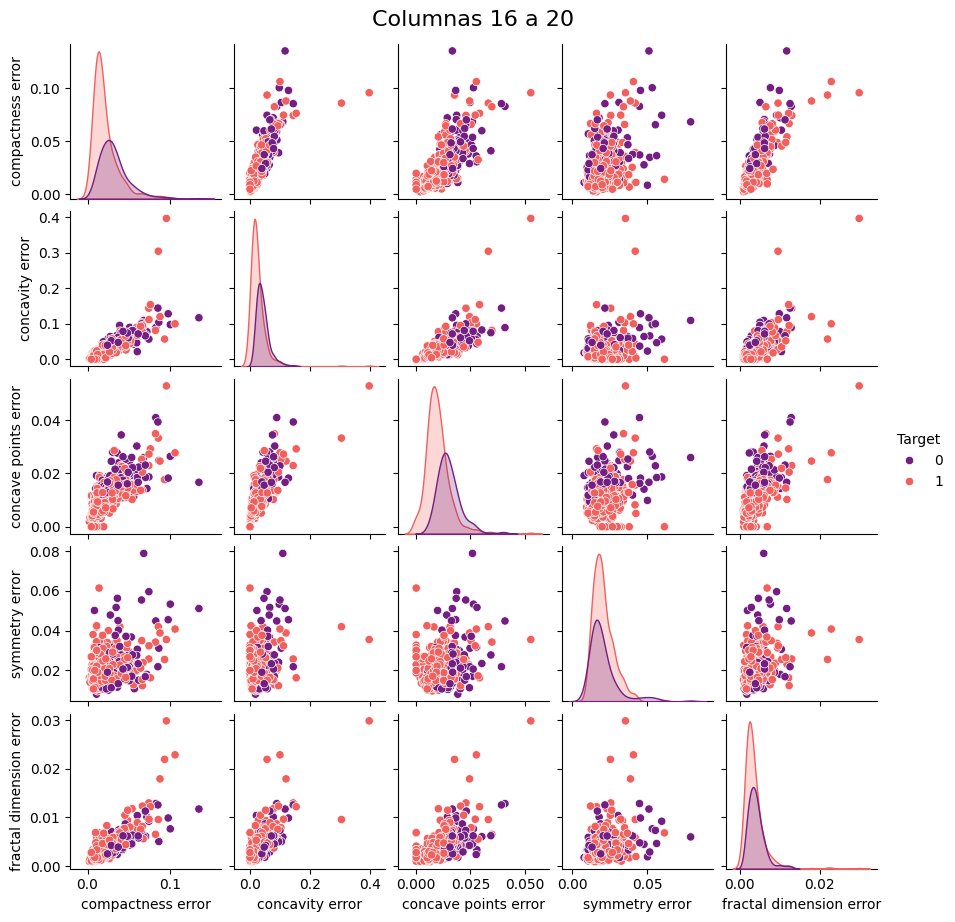

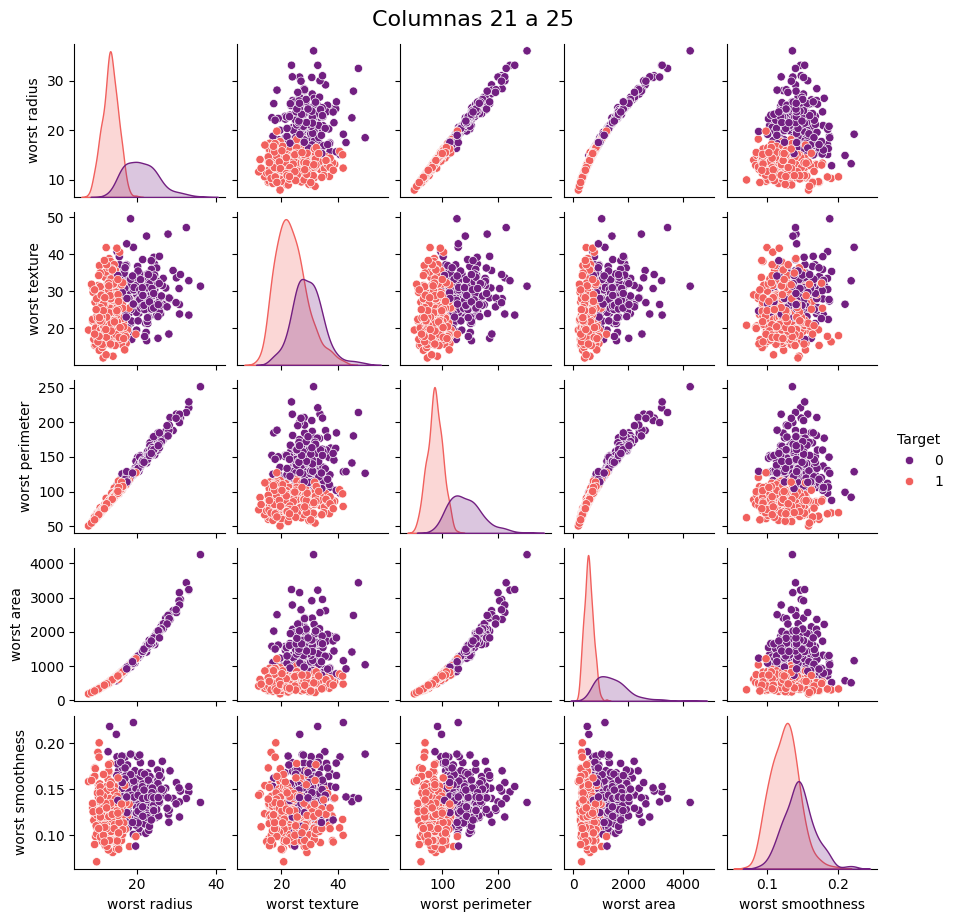

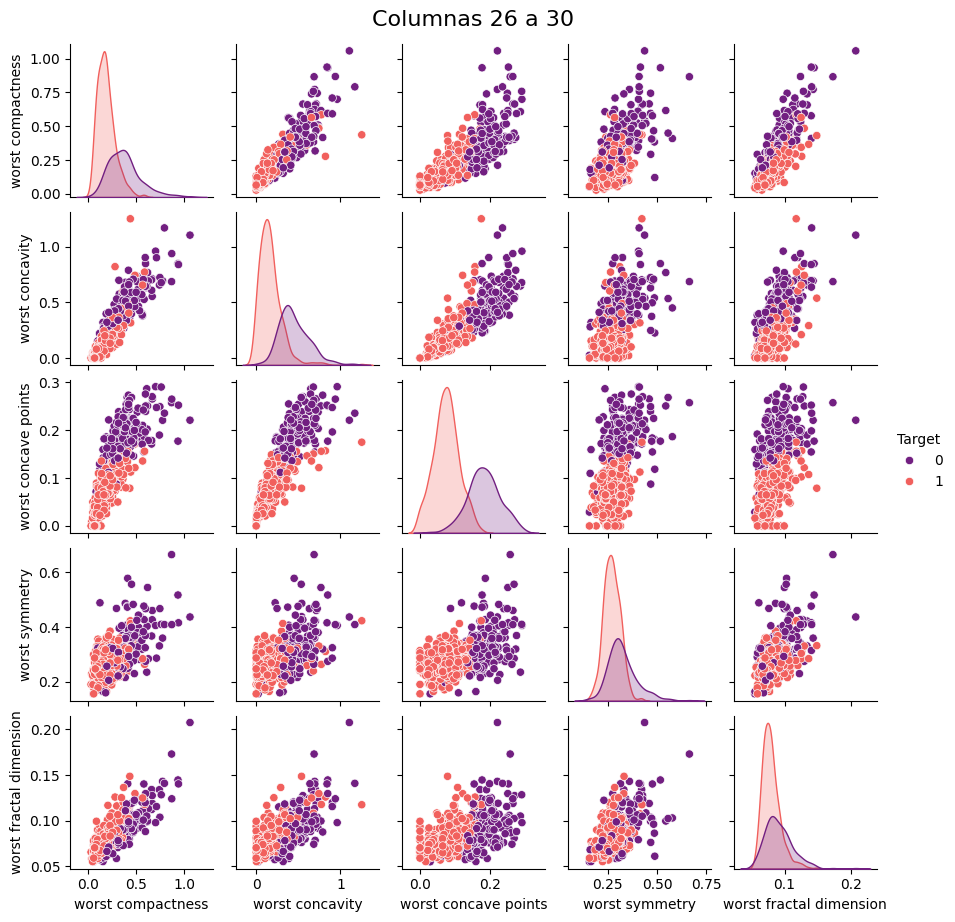

In [ ]:
X = df.drop("target", axis=1)
y = df["target"]

# Número de columnas por bloque
cols_per_plot = 5
total_columns = X.shape[1]
num_plots = (total_columns + cols_per_plot - 1) // cols_per_plot  # Redondeo hacia arriba

for idx in range(num_plots):
    start_col = idx * cols_per_plot
    end_col = min(start_col + cols_per_plot, total_columns)

    cols_block = X.columns[start_col:end_col].tolist() + ['Target']

    # Crear el pairplot para este bloque
    sns.pairplot(data[cols_block], hue='Target', palette='magma', height=1.8)
    plt.suptitle(f'Columnas {start_col+1} a {end_col}', y=1.02, fontsize=16)
    plt.show()

In [ ]:
# Hagamos una función para convertir los datos a tensores y hacer su propia estratificación

def prepare_all_data(X, y, scaler, train_size = 0.3, val_size = 0.5, random_state = 42):
  # Primero escalamos los datos
  escaler = scaler()
  X_scaled = escaler.fit_transform(X)

  # Hacemos X_train y y_train
  X_train, X_test_raw, y_train, y_test_raw = train_test_split(X_scaled, y, stratify = y, test_size = train_size, random_state = random_state)

  # Hacemos las demás variables
  X_test, X_val, y_test, y_val = train_test_split(X_test_raw, y_test_raw, stratify = y_test_raw, test_size = val_size, random_state = random_state)

  # Convertimos a tensor
  X_train, y_train, X_valid, y_valid, X_test, y_test = map(
      lambda x: torch.tensor(x, dtype = torch.float32),
      (X_train, y_train.values, X_val, y_val.values, X_test, y_test.values)
  )

  return X_train, y_train, X_valid, y_valid, X_test, y_test

# Creamos las variables
X_train, y_train, X_valid, y_valid, X_test, y_test = prepare_all_data(X, y, StandardScaler)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

torch.Size([398, 30])
torch.Size([398])
torch.Size([86, 30])
torch.Size([86])
torch.Size([85, 30])
torch.Size([85])


### Creamos la red neuronal, tendrá la siguiente arquitectura:
`Dense -> ReLU -> Dense -> ReLU -> activación Sigmoid`

Epoch: 10, Loss: 0.6503, Val Loss: 0.648, Val Acc: 0.8372
----------------------------------------
Epoch: 20, Loss: 0.5966, Val Loss: 0.5943, Val Acc: 0.8953
----------------------------------------
Epoch: 30, Loss: 0.5062, Val Loss: 0.5045, Val Acc: 0.9070
----------------------------------------
Epoch: 40, Loss: 0.3912, Val Loss: 0.3984, Val Acc: 0.9302
----------------------------------------
Epoch: 50, Loss: 0.288, Val Loss: 0.3076, Val Acc: 0.9302
----------------------------------------
Epoch: 60, Loss: 0.2125, Val Loss: 0.244, Val Acc: 0.9302
----------------------------------------
Epoch: 70, Loss: 0.163, Val Loss: 0.2028, Val Acc: 0.9302
----------------------------------------
Epoch: 80, Loss: 0.1312, Val Loss: 0.176, Val Acc: 0.9302
----------------------------------------
Epoch: 90, Loss: 0.1103, Val Loss: 0.158, Val Acc: 0.9186
----------------------------------------
Epoch: 100, Loss: 0.0959, Val Loss: 0.1454, Val Acc: 0.9186
----------------------------------------
Epoch

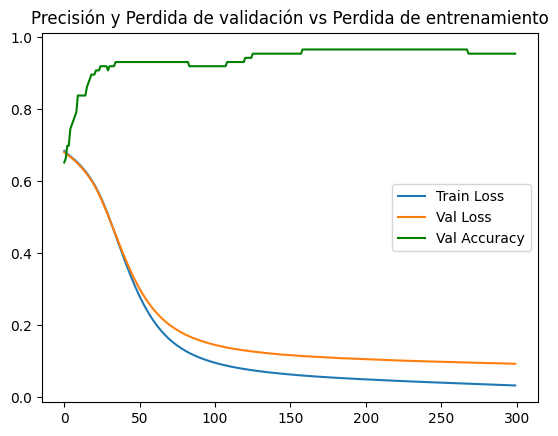

In [ ]:
class BinaryClassification(nn.Module):
  def __init__(self):
    super(BinaryClassification, self).__init__()

    self.layer_1 = nn.Linear(30, 32)
    self.layer_2 = nn.Linear(32, 16)
    self.layer_3 = nn.Linear(16, 1)

  def forward(self, x):
    x = F.relu(self.layer_1(x))
    x = F.relu(self.layer_2(x))
    x = torch.sigmoid(self.layer_3(x)) # para clasificación binaria
    return x

# Creamos el modelo y sus parametros
model = BinaryClassification()
loss_fn = nn.BCELoss()
optimizer = optim.NAdam(model.parameters(), lr=0.001)

# Creamos el bucle de entrenamiento
epochs = 300
val_loss = []
val_accs = []
losses = []

for epoch in range(epochs):
  model.train()
  outputs= model(X_train)
  loss = loss_fn(outputs.squeeze(), y_train) # <- Tenemos que usar Squeeze porque dá una dimensión de más

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  losses.append(loss.item())

  model.eval()
  with torch.no_grad():
    val_outputs = model(X_valid)
    val_loss_value = loss_fn(val_outputs.squeeze(), y_valid) # <- Tenemos que usar Squeeze porque dá una dimensión de más
    val_predicted = (val_outputs.squeeze() > 0.5).long() # <- esto tambien debe cambiarse
    val_acc = accuracy_score(y_valid.numpy(), val_predicted.numpy())
    val_loss.append(val_loss_value.item())
    val_accs.append(val_acc)

  if (epoch + 1) % 10 == 0:
    print(f"Epoch: {epoch+1}, Loss: {round(loss.item(), 4)}, Val Loss: {round(val_loss_value.item(), 4)}, Val Acc: {val_acc:.4f}")
    print("----"*10)

# Visualizamos los datos que nos da el entrenamiento
plt.plot(losses, label="Train Loss")
plt.plot(val_loss, label="Val Loss")
plt.plot(val_accs, label="Val Accuracy", color='green')
plt.title("Precisión y Perdida de validación vs Perdida de entrenamiento")
plt.legend()
plt.show()

Accuracy: 97.6471%
----------------------------------------


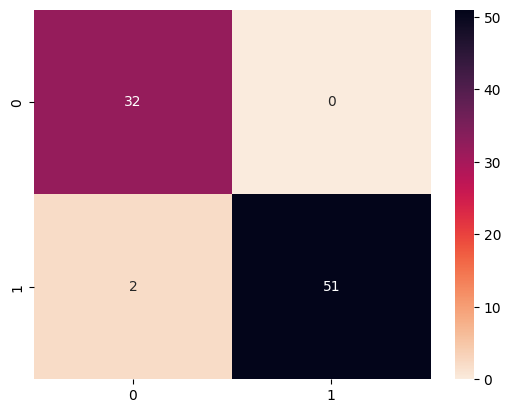

In [ ]:
# Evaluando con los el set de testeo
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    predicted = (outputs.squeeze() > 0.5).long() # igual aquí
    acc = accuracy_score(y_test.numpy(), predicted.numpy())
    print(f'Accuracy: {acc*100:.4f}%')
    print("----"*10)

# Creamos su matriz de confusión
cm = confusion_matrix(y_test.numpy(), predicted.numpy())
sns.heatmap(cm, annot=True, fmt='d', cmap="rocket_r")
plt.show()